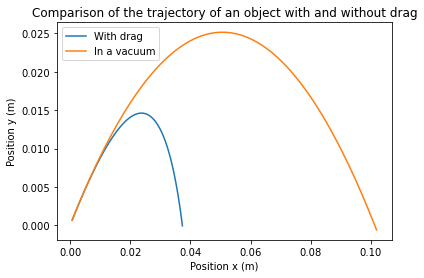

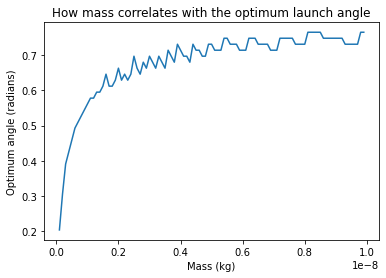

In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np

# setting parameters
g = -9.81
D = 1e-4
volume = (4.0/3.0) * math.pi * (D/2.0)**3
rho = 2000 # given in the exercise
m = rho * volume
B = 1.6e-4
b = B*D
dt = 0.001
tmax = 10 #seconds# initial conditions
theta = math.pi/4

#In the following section of code the calculations for an object's postions is analyzed outside a vacuum (with drag)    
#Drag:
vw = 1
tw = 0
tlw = [tw]

yw = 0
xw = 0

vxw = vw * np.cos(theta)
vyw = vw * np.sin(theta)

vxwl = []
vywl = []

# Iteratively updating position using the equations of motion in a case with drag
while (yw >=0):
    dvxw = - (b/m)*vxw*dt
    dvyw = g*dt - (b/m)*vyw*dt
    vxw = vxw + dvxw
    vyw = vyw + dvyw
    dxw = vxw * dt
    dyw = vyw * dt
    xw = xw + dxw
    yw = yw + dyw

    vxwl.append(xw)
    vywl.append(yw)
    tw = tw + dt
    
    
#In the following section of code the calculations for an object's postions is analyzed in a vacuum (no drag)    
#No Drag intial conditions
vn = 1
tn = 0
tln = [tn]

yn = 0
xn = 0

vxn = vn * np.cos(theta)
vyn = vn * np.sin(theta)

vxnl = []
vynl = []

# Iteratively updating position using the equations of motion in vacuum case
while (yn >=0):
    dvxn = 0 
    dvyn = g*dt 
    vxn = vxn + dvxn
    vyn = vyn + dvyn
    dxn = vxn * dt
    dyn = vyn * dt
    xn = xn + dxn
    yn = yn + dyn

    vxnl.append(xn)
    vynl.append(yn)
    
    tn = tn + dt

plt.figure()
plt.plot(vxwl,vywl,'-',label="With drag")
plt.plot(vxnl,vynl,'-',label="In a vacuum")
plt.legend(loc = 'upper left')
plt.xlabel('Position x (m)')
plt.ylabel('Position y (m)')
plt.title('Comparison of the trajectory of an object with and without drag')
plt.show()


#Finding the optimum angle with drag
#plotting angles vs the horizontal displacement they give
angle_range = np.arange(0,np.pi/2,0.017)
mass_r = np.arange(1e-10,1e-8, 1e-10)
lmaxang= []
massr = []

# Finds the optimum angle for each mass in mass_r by going through a range of angles 
for j in mass_r:
    posx = []
    for i in angle_range:
        vw = 1
        tw = 0
        tlw = [tw]

        yw = 0
        xw = 0

        vxw = vw * np.cos(i)
        vyw = vw * np.sin(i)
        
        # Iteratively updating position using the equations of motion in a case with drag
        while (yw >=0):
            dvxw = - (b/j)*vxw*dt
            dvyw = g*dt - (b/j)*vyw*dt
            vxw = vxw + dvxw
            vyw = vyw + dvyw
            dxw = vxw * dt
            dyw = vyw * dt
            xw = xw + dxw
            yw = yw + dyw
            tw = tw + dt
        posx.append(xw)
    lmaxang.append(angle_range[posx.index(max(posx))])
   
plt.figure    
plt.plot(mass_r,lmaxang,'-')
plt.xlabel('Mass (kg)')
plt.ylabel('Optimum angle (radians)')
plt.title('How mass correlates with the optimum launch angle') 
plt.show()
                       
              
                       

In [80]:
ghjcf= [1, 2, 3, 4, 5 ,6, 7 ,1]
print(ghjcf.index(max(ghjcf)))

6
